# Exploring the Titanic dataset with seaborn

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg"/>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set defaults for the seaborn library

In [12]:
sns.set(style="white", font="DejaVu Sans Mono")

Load the Titanic dataset

In [13]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [14]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Set better names for some variables

In [15]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [16]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg",
                                               "Q": "Queenstown",
                                               "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [17]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
dtype: int64

Create a palette for the plots

In [18]:
pal = dict(man="#4682B4", woman="pink", child="#2E8B57",
           male="#6495ED", female="pink")

## Who were the Titanic passengers?

Get the number of males and females ignoring age

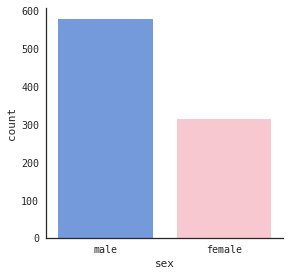

In [19]:
sns.factorplot("sex", data=titanic, kind='count', palette=pal)

Look at how this is distributed across three classes

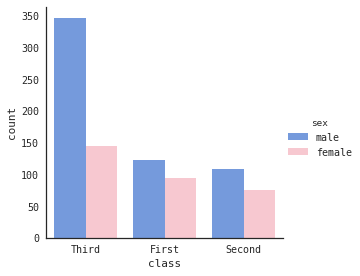

In [20]:
sns.factorplot("class", data=titanic, hue="sex", kind='count', palette=pal);

Separate the classification by children as the **women and chidren first** policy was followed during evacuation

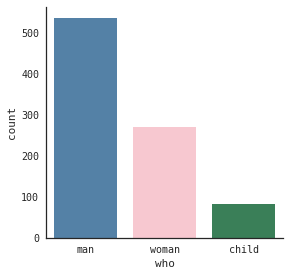

In [21]:
sns.factorplot("who", data=titanic, kind='count', palette=pal);

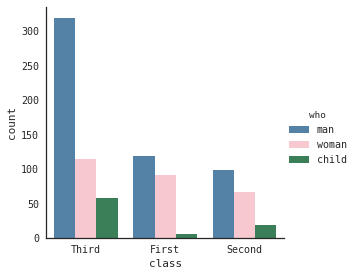

In [22]:
sns.factorplot("class", data=titanic, hue="who", kind='count', palette=pal);

Look at the distribution of ages across the groups

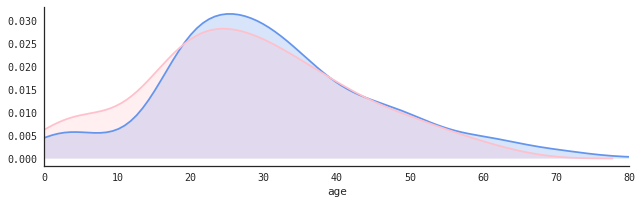

In [23]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

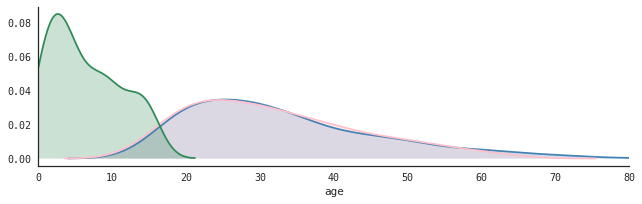

In [24]:
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

### How may first, second, and third class passengers are in our sample?

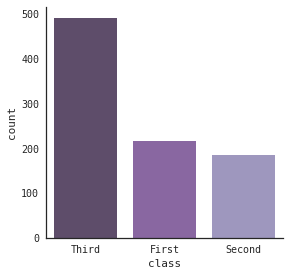

In [25]:
sns.factorplot("class", data=titanic, kind='count', palette="BuPu_d");

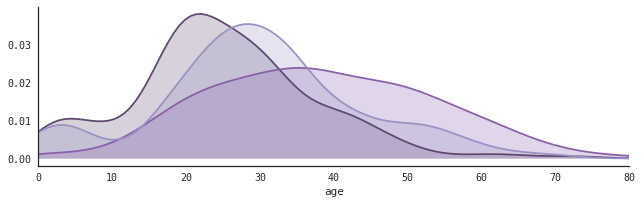

In [26]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

Look at the breakdown by age and sex

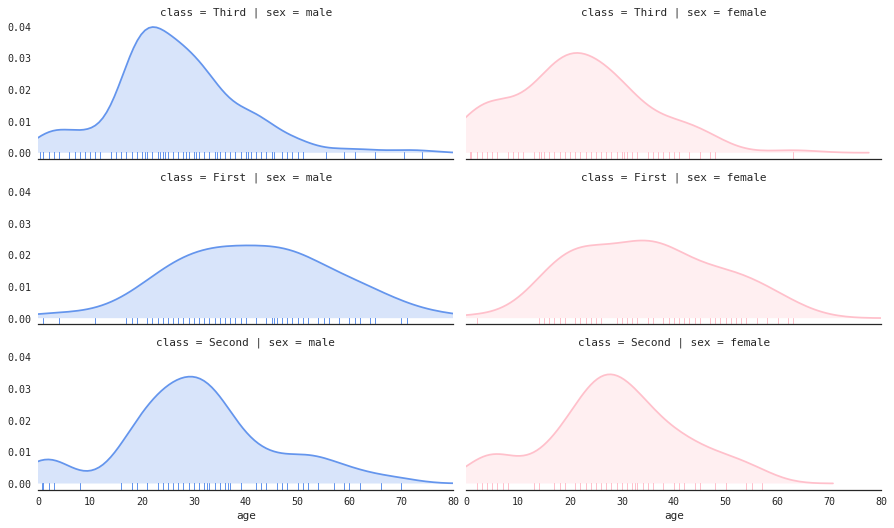

In [27]:
fg = sns.FacetGrid(titanic, col="sex", row="class", hue="sex", size=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

### Where did the passengers come from?

The Titanic passengers embarked at one of three ports before the voyage.

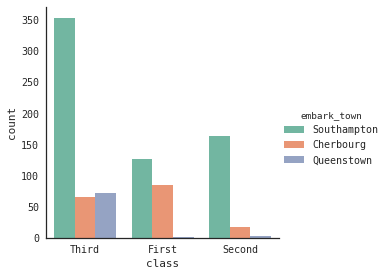

In [28]:
sns.factorplot("class", data=titanic, hue="embark_town", kind='count', palette="Set2");

##  What made people survive the sinking?

<img src="http://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg"/>

First a count of how many of our passengers perished in the sinking

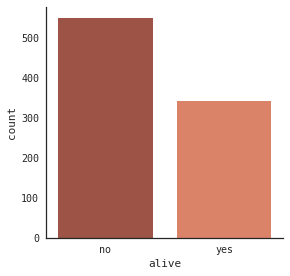

In [29]:
sns.factorplot("alive", data=titanic, kind='count', palette="OrRd_d");

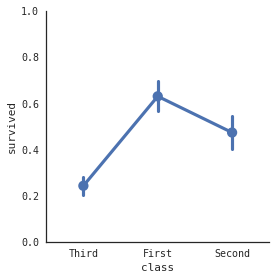

In [30]:
sns.factorplot("class", "survived", data=titanic).set(ylim=(0, 1))

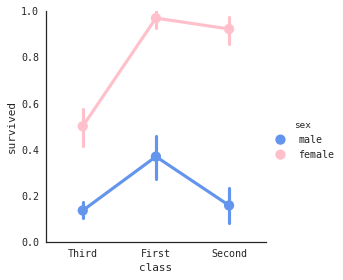

In [31]:
sns.factorplot("class", "survived", data=titanic, hue="sex", palette=pal).set(ylim=(0, 1));

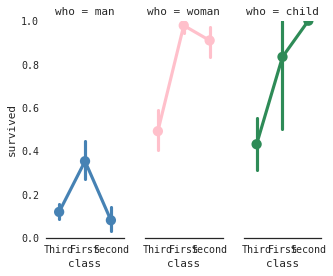

In [32]:
fg = sns.factorplot("class", "survived", data=titanic, hue="who", col="who", palette=pal, aspect=.4)
fg.set(ylim=(0, 1))
fg.despine(left=True)

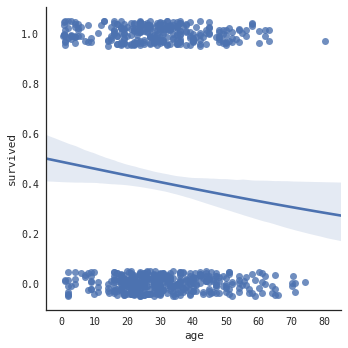

In [33]:
sns.lmplot("age", "survived", titanic, logistic=True, y_jitter=.05);

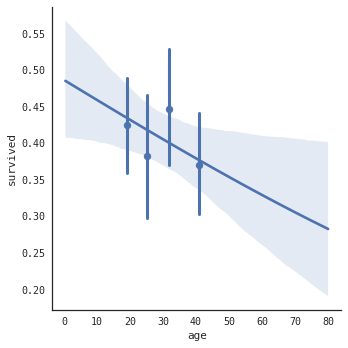

In [34]:
sns.lmplot("age", "survived", titanic, logistic=True, x_bins=4, truncate=True);

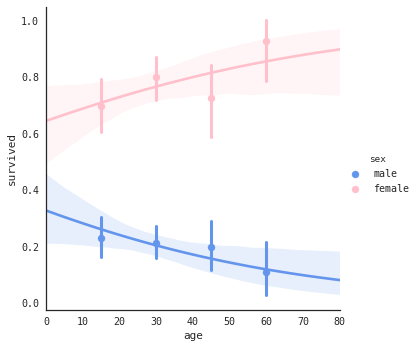

In [35]:
age_bins = [15, 30, 45, 60]
sns.lmplot("age", "survived", titanic, hue="sex",
           palette=pal, x_bins=age_bins, logistic=True).set(xlim=(0, 80));

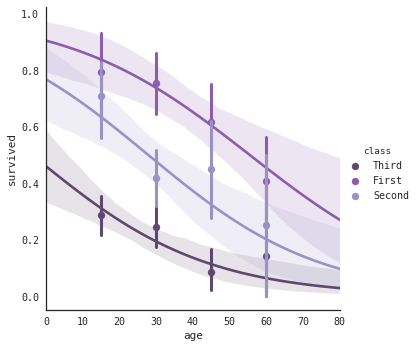

In [36]:
sns.lmplot("age", "survived", titanic, hue="class",
           palette="BuPu_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80));

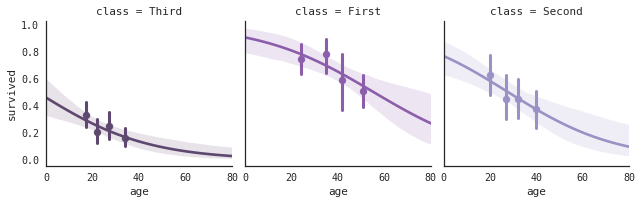

In [37]:
sns.lmplot("age", "survived", titanic, col="class", hue="class",
           palette="BuPu_d", x_bins=4, logistic=True, size=3).set(xlim=(0, 80));